# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [19]:
hp_df = movies[movies["title"].str.contains("Harry Potter", case=False)].sort_values(by="year",ascending=False)
print(hp_df.head())

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005


### How many movies were made in the year 2017?

In [27]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [26]:
movie_qty_2015 = len(movies[movies.year ==2015])
print(f"Movies made in 2015: {movie_qty_2015}")

Movies made in 2015: 8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [33]:
movie_qty_2018 = len(movies[(movies.year>+2000) & (movies.year<+2018)])
print(f"Movies made between 2000-2018: {movie_qty_2018}")

Movies made between 2000-2018: 103250


### Section I - Q4: How many movies are titled "Hamlet"?

In [32]:
ham_df = movies[movies["title"]=="Hamlet"]
print(f"Movies titled 'Hamlet': {len(ham_df)}")

Movies titled 'Hamlet': 20


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [36]:
ham_df = ham_df[ham_df["year"]>=2000].sort_values(by='year', ascending=True)
print(ham_df)

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [47]:
incep_Scast_qty = cast[cast["title"] == "Inception"]["n"].isna().sum()
print(f"Supporting Cast Members in Inception: {incep_cast_qty}")

Supporting Cast Members in Inception: 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [49]:
incep_Mcast_qty = cast[cast["title"] == "Inception"]["n"].count()
print(f"Main Cast Members in Inception: {incep_Mcast_qty}")

Main Cast Members in Inception: 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [61]:
incep_10 = cast[cast["title"] == "Inception"].sort_values("n").iloc[0:10]
print(incep_10)

             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [71]:
albus_df = cast[cast["character"] == "Albus Dumbledore"]
print(albus_df.title)

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object


In [68]:
albus_grouped = albus_df.name.unique()
print(albus_grouped)

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [77]:
KR_df = cast[cast["name"]=="Keanu Reeves"]
print(F"Keanu Reevs has played: {len(KR_df)} roles")

Keanu Reevs has played: 62 roles


In [81]:
KR_sort = KR_df[(KR_df["year"]>=1999) & (KR_df["n"]==1)].sort_values("year")
print(KR_sort)

                                 title  year          name   type  \
1892390                     The Matrix  1999  Keanu Reeves  actor   
1892397               The Replacements  2000  Keanu Reeves  actor   
1892358                      Hard Ball  2001  Keanu Reeves  actor   
1892383                 Sweet November  2001  Keanu Reeves  actor   
1892348                    Constantine  2005  Keanu Reeves  actor   
1892388                 The Lake House  2006  Keanu Reeves  actor   
1892382                   Street Kings  2008  Keanu Reeves  actor   
1892385  The Day the Earth Stood Still  2008  Keanu Reeves  actor   
1892359                  Henry's Crime  2010  Keanu Reeves  actor   
1892342                       47 Ronin  2013  Keanu Reeves  actor   
1892361                      John Wick  2014  Keanu Reeves  actor   
1892366                    Knock Knock  2015  Keanu Reeves  actor   
1892399                The Whole Truth  2016  Keanu Reeves  actor   
1892362           John Wick: Chapt

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [90]:
def total_roles(date1:int,date2:int):
    roles_df = cast[(cast["year"]>=date1) & (cast["year"]<=date2)]
    return f"Between {date1}-{date2} there were {len(roles_df)} roles available"

total_roles(1950,1960)

'Between 1950-1960 there were 234635 roles available'

In [91]:
total_roles(2007,2017)

'Between 2007-2017 there were 1452413 roles available'

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [92]:
roles_df = cast[cast["year"]>=2000]
print(f"Between 2000-present there were {len(roles_df)} roles available")


Between 2000-present there were 1949762 roles available


In [99]:
nonlead_df = cast[(cast["year"]>=2000) & (cast["n"]>1)]
print(f"Between 2000-present there were {len(nonlead_df)} non-leading roles available (excluding support cast)")

Between 2000-present there were 1001710 non-leading roles available (excluding support cast)


In [108]:
nonlead_df = cast[(cast["year"]>=2000) & (cast["n"].isna())]
print(f"Between 2000-present there were {len(nonlead_df)} support roles available")

Between 2000-present there were 887484 support roles available


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [109]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

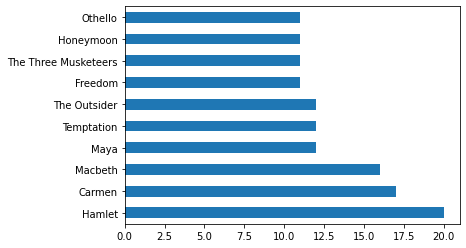

In [110]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [116]:
top_2000 = movies[(movies["year"]>=2000)].year.value_counts()[:3]
print(top_2000)

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:xlabel='Num movies'>

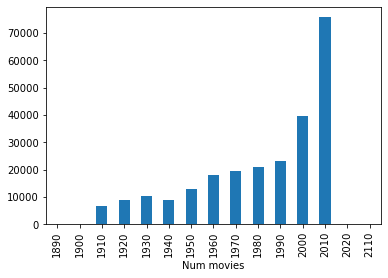

In [278]:
def get_decade(year):
    return year//10*10


movies["decade"] = movies.year.map(get_decade)
movies_group = movies.groupby("decade").count()
movies_group.title.plot(kind="bar",xlabel="Num movies")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [121]:
cast.character.value_counts().iloc[0:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [125]:
cast[cast["character"]=="Herself"].name.value_counts().iloc[0:10]

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [126]:
cast[cast["character"]=="Himself"].name.value_counts().iloc[0:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [131]:
cast[cast["character"].str.startswith("Zombie")].character.value_counts().iloc[0:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [132]:
cast[cast["character"].str.startswith("Police")].character.value_counts().iloc[0:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [139]:
cast[cast["name"] == 'Keanu Reeves'].year.value_counts()

2016    5
1988    4
1993    4
2003    3
2017    3
1986    3
2000    3
1999    3
2005    3
1991    3
1996    2
1989    2
1997    2
2001    2
2006    2
1990    2
2008    2
1995    2
2013    2
2018    1
1994    1
2010    1
1985    1
2015    1
2019    1
2014    1
2012    1
1992    1
2009    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year', ylabel='n'>

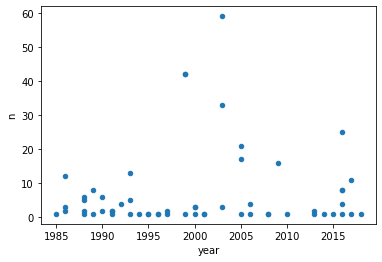

In [141]:
KR_df = cast[cast["name"]=="Keanu Reeves"]
KR_df.plot.scatter(x="year",y="n")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

In [260]:
cast.head()


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


/var/folders/hn/vdq8ffhj0zq9blr74w80pr180000gn/T/ipykernel_7928/2942726855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet["decade"] = hamlet.year.map(get_decade)


<AxesSubplot:xlabel='Num movies'>

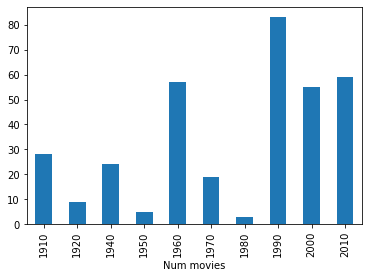

In [275]:
def get_decade(year):
    return year//10*10

hamlet = cast[cast["title"]=="Hamlet"]
hamlet["decade"] = hamlet.year.map(get_decade)
ham_group_df = hamlet.groupby("decade").count()
ham_group_df.title.plot(kind="bar",xlabel="Num movies")

             title              name     type              character     n
year                                                                      
1996-01-01  Hamlet        Riz Abbasi    actor  Attendant to Claudius   1.0
1921-01-01  Hamlet  Fritz Achterberg    actor            Fortinbras,   9.0
2009-01-01  Hamlet      Hayden Adams    actor                Laertes   7.0
2009-01-01  Hamlet      Hayden Adams    actor                 Player   7.0
1913-01-01  Hamlet       Eric Adeney    actor               Reynaldo  14.0
...            ...               ...      ...                    ...   ...
1969-01-01  Hamlet    Jennifer Tudor  actress             Court lady  23.0
2000-01-01  Hamlet      Diane Venora  actress               Gertrude   3.0
1996-01-01  Hamlet     Perdita Weeks  actress          Second Player  44.0
2015-01-01  Hamlet   Katie (II) West  actress                Ophelia   7.0
1996-01-01  Hamlet      Kate Winslet  actress                Ophelia  46.0

[342 rows x 5 columns]
 

/var/folders/hn/vdq8ffhj0zq9blr74w80pr180000gn/T/ipykernel_7928/3542101997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet["year"] = pd.to_datetime(hamlet["year"],format="%Y")


<AxesSubplot:xlabel='year'>

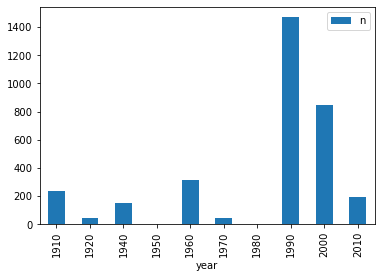

In [267]:
#Please check this code! not sure if correct
hamlet = cast[cast["title"]=="Hamlet"]
hamlet["year"] = pd.to_datetime(hamlet["year"],format="%Y")
hamlet = hamlet.set_index("year")
print(hamlet)
hamlet = hamlet.groupby(hamlet.index.year//10*10).sum("title")
print(hamlet)
hamlet.plot(kind="bar")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [146]:
lead_60s = cast[(cast["year"]>=1960) & (cast["year"]<=1969) & (cast["n"] ==1)]
print(f"1960's leading roles: {len(lead_60s)}")

1960's leading roles: 11823


In [148]:
lead_2000s = cast[(cast["year"]>=2000) & (cast["year"]<=2009) & (cast["n"] ==1)]
print(f"2000's leading roles: {len(lead_2000s)}")

2000's leading roles: 26344


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [207]:

frank_df = cast[cast["name"]=="Frank Oz"]
count_frank = frank_df.groupby(["title","year"]).count()
count_frank[count_frank["name"]>1].sort_values("year")
#frank_df[frank_df.duplicated(subset="title")].sort_values("year").drop_duplicates("title")

,,name,type,character,n
title,year,,,,
The Muppet Movie,1979,8,8,8,8
An American Werewolf in London,1981,2,2,2,2
The Great Muppet Caper,1981,6,6,6,6
The Dark Crystal,1982,2,2,2,2
The Muppets Take Manhattan,1984,7,7,7,7
Follow That Bird,1985,3,3,3,3
The Muppet Christmas Carol,1992,7,7,7,7
Muppet Treasure Island,1996,4,4,4,4
Muppets from Space,1999,4,4,4,4


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [221]:
frank_characters = frank_df.groupby(["character"]).count()
frank_2x = frank_characters[frank_characters["title"] >1]
print(frank_2x.index)

Index(['Animal', 'Bert', 'Cookie Monster', 'Fozzie Bear', 'Grover',
       'Miss Piggy', 'Sam the Eagle', 'Yoda'],
      dtype='object', name='character')


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

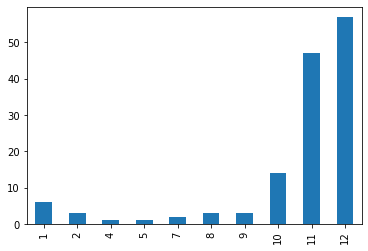

In [186]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

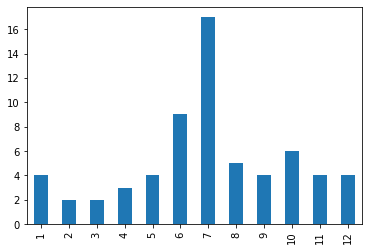

In [189]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

/var/folders/hn/vdq8ffhj0zq9blr74w80pr180000gn/T/ipykernel_7928/1009130375.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  christmas.date.dt.week.value_counts().sort_index().plot(kind='bar')


<AxesSubplot:>

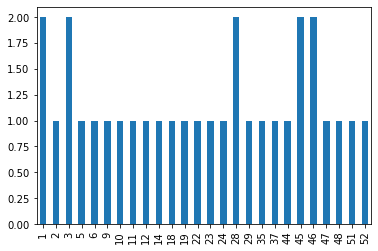

In [191]:
christmas = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
christmas.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [238]:
merged_df = pd.merge(cast,release_dates,how="inner",on="title").drop("year_y",axis=1).rename(columns = {"year_x": "year"})

KR_lead = merged_df[(merged_df["name"]=="Keanu Reeves") & (merged_df["n"]==1) & (merged_df["country"]=="USA")].sort_values("year")

print(KR_lead)

                                     title  year          name   type  \
21030349                  The Night Before  1988  Keanu Reeves  actor   
11560862  Bill & Ted's Excellent Adventure  1989  Keanu Reeves  actor   
3957308         Bill & Ted's Bogus Journey  1991  Keanu Reeves  actor   
13820799                     Little Buddha  1993  Keanu Reeves  actor   
11159052                             Speed  1994  Keanu Reeves  actor   
11159049                             Speed  1994  Keanu Reeves  actor   
11159047                             Speed  1994  Keanu Reeves  actor   
14111937              A Walk in the Clouds  1995  Keanu Reeves  actor   
2635357                    Johnny Mnemonic  1995  Keanu Reeves  actor   
17336298                    Chain Reaction  1996  Keanu Reeves  actor   
18731184                 Feeling Minnesota  1996  Keanu Reeves  actor   
10765357              The Devil's Advocate  1997  Keanu Reeves  actor   
16565628                        The Matrix  1999  K

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

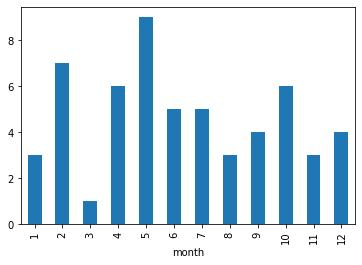

In [250]:
KR_US_df = merged_df[(merged_df["name"]=="Keanu Reeves")& (merged_df.country == 'USA')]
KR_US_df.date.dt.month.value_counts().sort_index().plot(kind='bar', xlabel="month")


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:xlabel='month'>

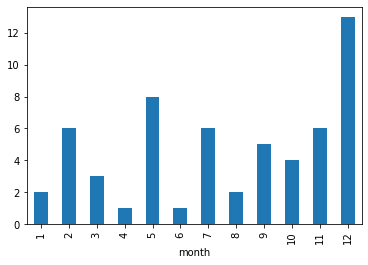

In [252]:
IM_US_df = merged_df[(merged_df["name"]=="Ian McKellen")& (merged_df.country == 'USA')]
IM_US_df.date.dt.month.value_counts().sort_index().plot(kind='bar', xlabel="month")
